In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [6]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["price"] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x = df.drop("price", axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

model.fit(x_train, y_train)
pred = model.predict(x_test)

# model = LinearRegression()
# model.fit(x_train,y_train)

In [8]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

MSE:  0.5558915986952442
RMSE:  0.7455813830127763


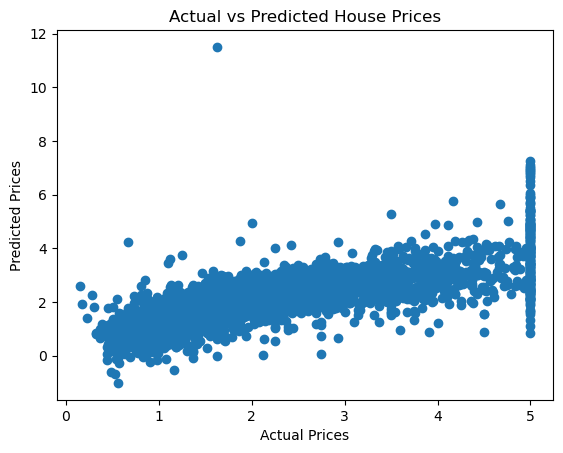

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"] = data.target

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Comparison between all models
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ),
    
    "Gradient Boosting": GradientBoostingRegressor(
        random_state=42
    )
}

# -----------------------------
# Train & evaluate
# -----------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions) ** 0.5
    results.append((name, rmse))

# -----------------------------
# Display results
# -----------------------------
results_df = pd.DataFrame(results, columns=["Model", "RMSE"])
print(results_df.sort_values("RMSE"))


               Model      RMSE
2      Random Forest  0.503960
3  Gradient Boosting  0.542215
1   Ridge Regression  0.745557
0  Linear Regression  0.745581
